<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [2]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

# Wanted to see relation between Critical credit history and class
# credit_short = credit_train[['Class', 'CreditHistory.Critical']]
# credit_short.head(20)

<h3>Q.0. Write code to display the count of null values in each column<h3>

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64
Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccount

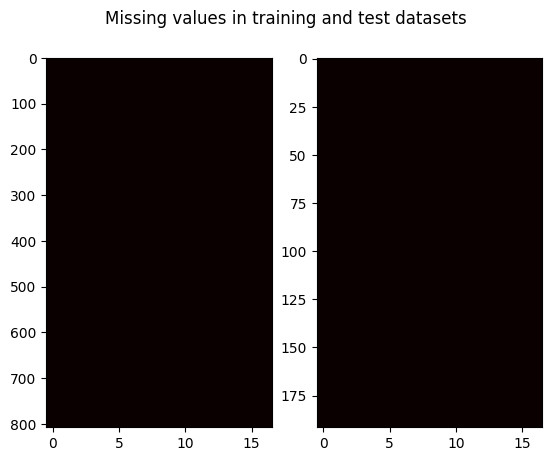

In [3]:
import matplotlib.pyplot as plt

# Command:
print(credit_train.isnull().sum())
print(credit_test.isnull().sum())
# One sentance summary:
# Yay! There appear to be no missing values (null) in the training and test datasets.

# One can also visualize the nulls
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Missing values in training and test datasets')
ax1.imshow(credit_train.isnull(), cmap='hot', aspect='auto')
ax2.imshow(credit_test.isnull(), cmap='hot', aspect='auto')
plt.show()

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

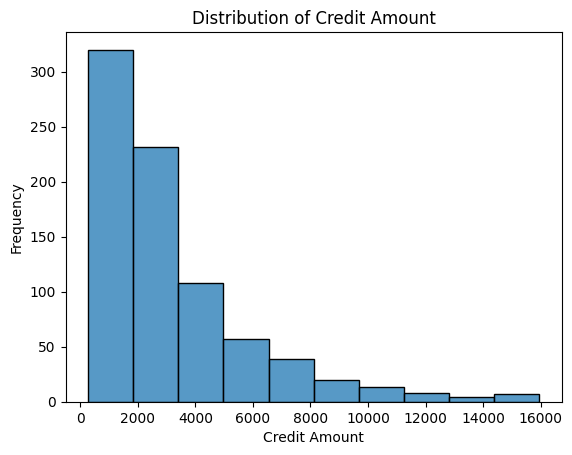

In [4]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#TODO
sns.histplot(credit_train['Amount'], bins=10)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Amount')
plt.show()


<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

<Axes: xlabel='CreditHistory.Critical', ylabel='count'>

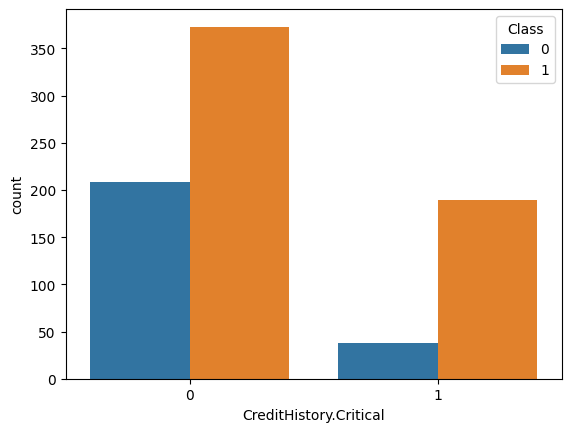

In [14]:
# Command:
sns.countplot(x='CreditHistory.Critical', hue='Class', data=credit_train)

# One sentence summary:
# I expected this to be more conclusive. Specifically I would have expected the CreditHistory.Critical=1 
# to have the height of the bars inverted. IE, Bad credit would outweigh Good credit when CreditHistory.Critical=1.
# But that's not the case... So maybe this is why the model is not performing so well? (~72% accuracy)

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

C:\Users\louis\AppData\Local\Temp\ipykernel_14488\4105422802.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_train['Class'] = credit_train['Class'].replace({'Bad': 0, 'Good': 1})
C:\Users\louis\AppData\Local\Temp\ipykernel_14488\4105422802.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_test['Class'] = credit_test['Class'].replace({'Bad': 0, 'Good': 1})


<Axes: >

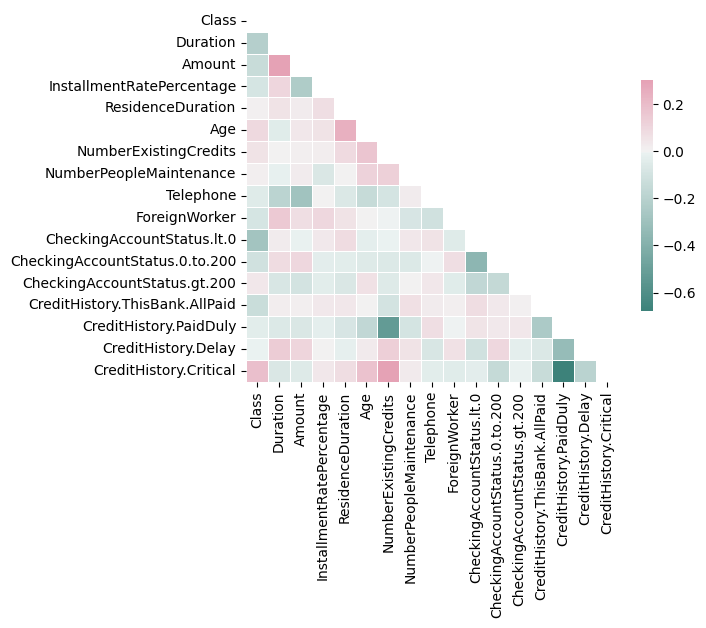

In [6]:
import numpy as np

credit_train['Class'] = credit_train['Class'].replace({'Bad': 0, 'Good': 1})
credit_test['Class'] = credit_test['Class'].replace({'Bad': 0, 'Good': 1})
credit_train.head()
credit_test.head()

# Wanted a view of the correlation matrix to know which variables are positively correlated with the Class
# This just comes from Seaborn documentation
corr = credit_train.corr()                                          # Get the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))                      # mask off the upper triangle
f, ax = plt.subplots(figsize=(6, 6))                                # Set up the matplotlib figure
diverge = sns.diverging_palette(180, 0, as_cmap=True)                 # Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=diverge, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


From the above Correlation matrix plot it appears CreditHistory.Critical and Age are most correlated with Class (the value we want to predict)

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [7]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logreg = LogisticRegression(penalty='none', solver='newton-cg')

# Fit the model to the training data
# Commented out but I also experimented with adding Age as a predictor
# Performance wasn't improved
# logreg.fit(credit_train[['CreditHistory.Critical', 'Age']], credit_train['Class'])
logreg.fit(credit_train[['CreditHistory.Critical']], credit_train['Class'])


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

# Predict the values from credit_test
# Note also tried this with Age but it did not improve the model
#predictions = logreg.predict(credit_test[['CreditHistory.Critical','Age']])
predictions = logreg.predict(credit_test[['CreditHistory.Critical']])

# Calculate the confusion matrix
print(confusion_matrix(credit_test['Class'], predictions))
#print(matthews_corrcoef(credit_test['Class'], predictions))
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])



[[  0  54]
 [  0 138]]
True positive =  0
False positive =  54
False negative =  0
True negative =  138


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [17]:
from sklearn.metrics import accuracy_score

# Predict the values from credit_test
# Also tried this with Age included but it did not improve the model
predictions = logreg.predict(credit_test[['CreditHistory.Critical']])

# Calculate the accuracy
accuracy = accuracy_score(credit_test['Class'], predictions)

print("Accuracy:", accuracy)


Accuracy: 0.71875


<h3>Q.7. Generate the ROC curve.</h3>

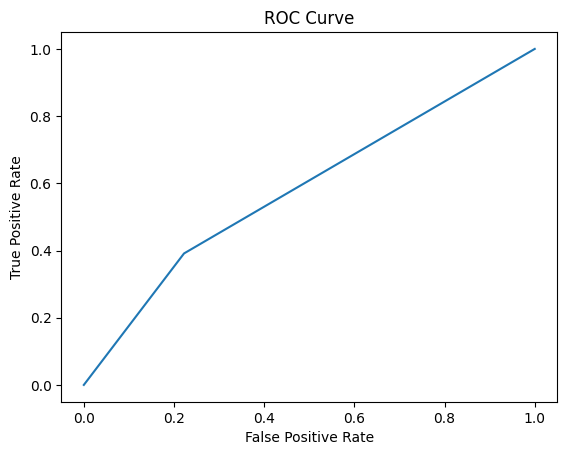

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities of the positive class
probabilities = logreg.predict_proba(credit_test[['CreditHistory.Critical']])[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(credit_test['Class'], probabilities)
auc_score = roc_auc_score(credit_test['Class'], probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [19]:
# Command(s):
# Calculate the AUC score
roc_auc_score(credit_test['Class'], probabilities)


0.5845410628019323

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Create the LDA model
lda = LinearDiscriminantAnalysis(solver='lsqr')

# Fit the model to the training data
lda.fit(credit_train[['CreditHistory.Critical']], credit_train['Class'])

# Predict the values from credit_test
predictions = lda.predict(credit_test[['CreditHistory.Critical']])



<h3>Q.10. What is the accuracy of the new model?</h3>

In [21]:
# Calculate the accuracy
accuracy = accuracy_score(credit_test['Class'], predictions)

print("Accuracy:", accuracy)

# Hmmm suspiciously similar to the logistic regression model


Accuracy: 0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

I am not sure my results are correct. I went through all the exercises and did the Log regression and LDA. At the end, I achieved the exact same accuracy with Log regression as I did with LDA. This was very surprising. Also I was a little disappointed in what I perceive as low accuracy. So I actually went back and added my Correlation Matrix plot to see what other features (X) might be correlated with Class (Y). Age was also correlated. I the re-computed both Log regression and LDA and very much to my surprise I had the same accuracy results as before. This leads me to think that there is something wrong with my Models... or with the calculation of accuracy. -- Louis Duran